In [1]:
# NumPy: 数値計算用ライブラリ
import numpy as np

# Pandas: データ分析用ライブラリ
import pandas as pd

# Seaborn: グラフ描画用ライブラリ
import seaborn as sns

# Matplotlib: グラフ描画用ライブラリ
import matplotlib.pyplot as plt

# itertools: 組み合わせを生成するためのモジュール
from itertools import combinations

# Scikit-learn: 機械学習のためのライブラリ
from sklearn.datasets import load_iris  # アイリスの花のデータセットをロードする関数
from sklearn.metrics import accuracy_score  # 正解率を計算する関数
from sklearn.tree import DecisionTreeClassifier  # 決定木
from sklearn.ensemble import RandomForestClassifier  # ランダムフォレスト
from sklearn.model_selection import train_test_split  # データ分割用関数
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # 標準化、ワンホットエンコーディング
from sklearn.svm import SVC  # サポートベクターマシン
from sklearn.neighbors import KNeighborsClassifier  # k近傍法
from sklearn import datasets  # データセット
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge, Lasso  # 線形回帰、ヒューバー回帰、リッジ回帰、ラッソ回帰
from sklearn.ensemble import GradientBoostingClassifier#勾配ブースティング

# SciPy: 科学技術計算のためのライブラリ
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster  # 階層的クラスタリング関数

# Keras: ディープラーニングのためのライブラリ
from keras.models import Sequential  # シーケンシャルモデル
from keras.layers import Dense  # 全結合層

# XGBoost: 勾配ブースティングのためのライブラリ
import xgboost as xgb


## <span style="color: DeepPink; ">6.1 クラスタリング</span>

### <span style="color: blue; ">irisデータのインポートと準備</span> 

In [2]:
iris = load_iris() # アイリスデータセットをロードして、irisオブジェクトに格納します。

df = pd.DataFrame(iris.data, columns=iris.feature_names) # DataFrameを作成。列名はiris.feature_names
df['target'] = iris.target # アイリスデータセットのターゲット（種類）を新しい列として追加。
df.loc[df['target'] == 0, 'target'] = "setosa" # ターゲットが0の行を見つけ、その値を"setosa"に置き換え
df.loc[df['target'] == 1, 'target'] = "versicolor"
df.loc[df['target'] == 2, 'target'] = "virginica"
df

C:\Users\tetsu\AppData\Local\Temp\ipykernel_24968\287473800.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'setosa' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df['target'] == 0, 'target'] = "setosa" # ターゲットが0の行を見つけ、その値を"setosa"に置き換え


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        target  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

In [3]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

C:\Users\tetsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tetsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tetsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tetsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

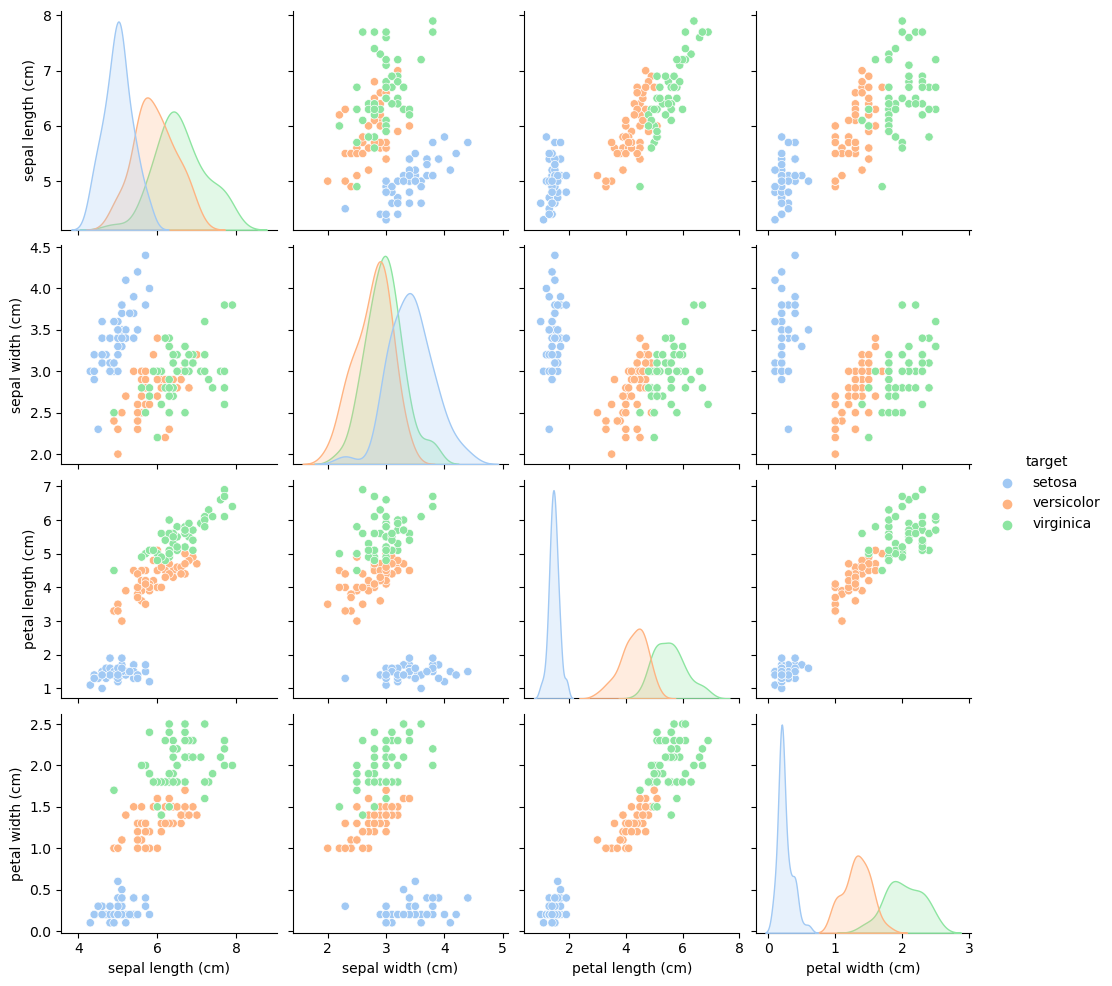

In [3]:
%matplotlib inline
palette = sns.color_palette("pastel")[:3]
sns.pairplot(df, hue="target", palette=palette)
plt.show()

### <span style="color: blue; ">階層クラスタリング</span> 

In [4]:
# ①dfの最初の4列を使ってユークリッド距離とウォード法による階層的クラスタリングを実行
clustering_results_all = linkage(df.iloc[:, 0:4], metric='euclidean', method='ward')

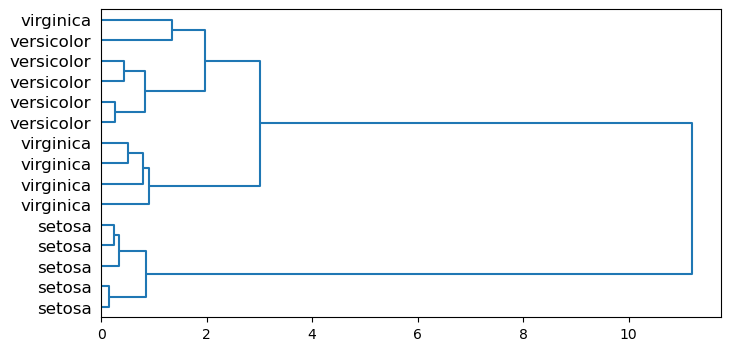

In [5]:
indices = list(range(0, 5)) + list(range(50, 55)) + list(range(100, 105))
df_subset = df.iloc[indices, :]
clustering_results = linkage(df_subset.iloc[:, 0:4], metric='euclidean', method='ward')
plt.figure(figsize=(8, 4))
plt.rcParams['font.size'] = 10
# ②樹形図の表示
dendrogram(clustering_results, labels=df_subset["target"].values, color_threshold=0, orientation='right', leaf_font_size=12)
plt.show()

### <span style="color: blue; ">階層クラスタリングに基づく分類</span> 

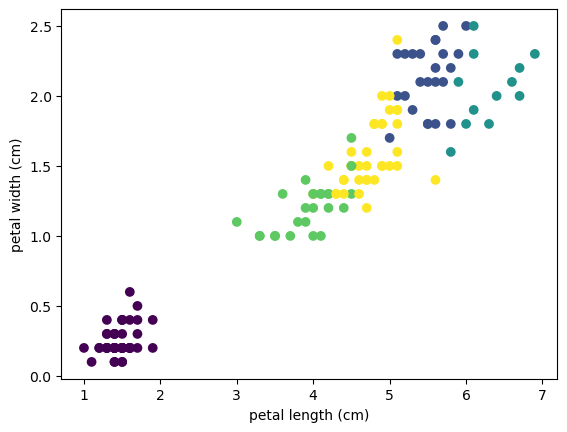

In [8]:
# number_of_clusters =3
number_of_clusters =5
cluster_numbers = fcluster(clustering_results_all, number_of_clusters, criterion='maxclust') # ①
cluster_numbers = pd.DataFrame(cluster_numbers)
plt.scatter(df.iloc[:,2],df.iloc[:, 3],  c=cluster_numbers.iloc[:, 0])
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])
plt.show()

## <span style="color: DeepPink; ">6.2 k近傍法</span>

### <span style="color: blue; ">決定境界描写</span> 

In [11]:
# ①指定された分類器で、データセットの2次元特徴の組み合わせごとに決定境界をプロットする関数
def plot_decision_boundaries(clf, df, y):
    """
    指定された分類器で、データセットの2次元特徴の組み合わせごとに決定境界をプロットする関数。

    Parameters:
    clf (classifier): 使用する分類器（例: sklearnの分類器）
    df (pandas.DataFrame): 特徴量を含むデータフレーム
    y (numpy.ndarray): ターゲット変数（ラベル）

    Returns:
    None
    """
    combos = combinations(range(4), 2)  # ②2つを選ぶ全ての組み合わせを生成
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    # 各特徴の組み合わせごとにループ
    for ax, (i, j) in zip(axes, combos):
        X_subset = df.iloc[:, [i, j]].values  # 選択された2つの特徴でデータセットのサブセットを作成
        clf.fit(X_subset, y)  # ③分類器を訓練
        y_pred = clf.predict(X_subset)  # 訓練された分類器で予測
        accuracy = accuracy_score(y, y_pred)  # 予測の正解率を計算

        h = .1  # メッシュのステップサイズ
        # メッシュグリッドを作成するための範囲を計算
        x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
        y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # メッシュグリッド上で予測を行い、決定境界をプロット
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
        # 元のデータポイントをプロット
        scatter = ax.scatter(X_subset[:, 0], X_subset[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
        # 軸にラベルを設定
        ax.set_xlabel(df.columns[i])
        ax.set_ylabel(df.columns[j])
        # サブプロットのタイトルに正解率を表示
        ax.set_title(f'Accuracy: {accuracy:.2f}')
        
    plt.tight_layout()  # グラフのレイアウトを整える
    plt.show()  # グラフを表示

### <span style="color: blue; ">３－近傍</span> 

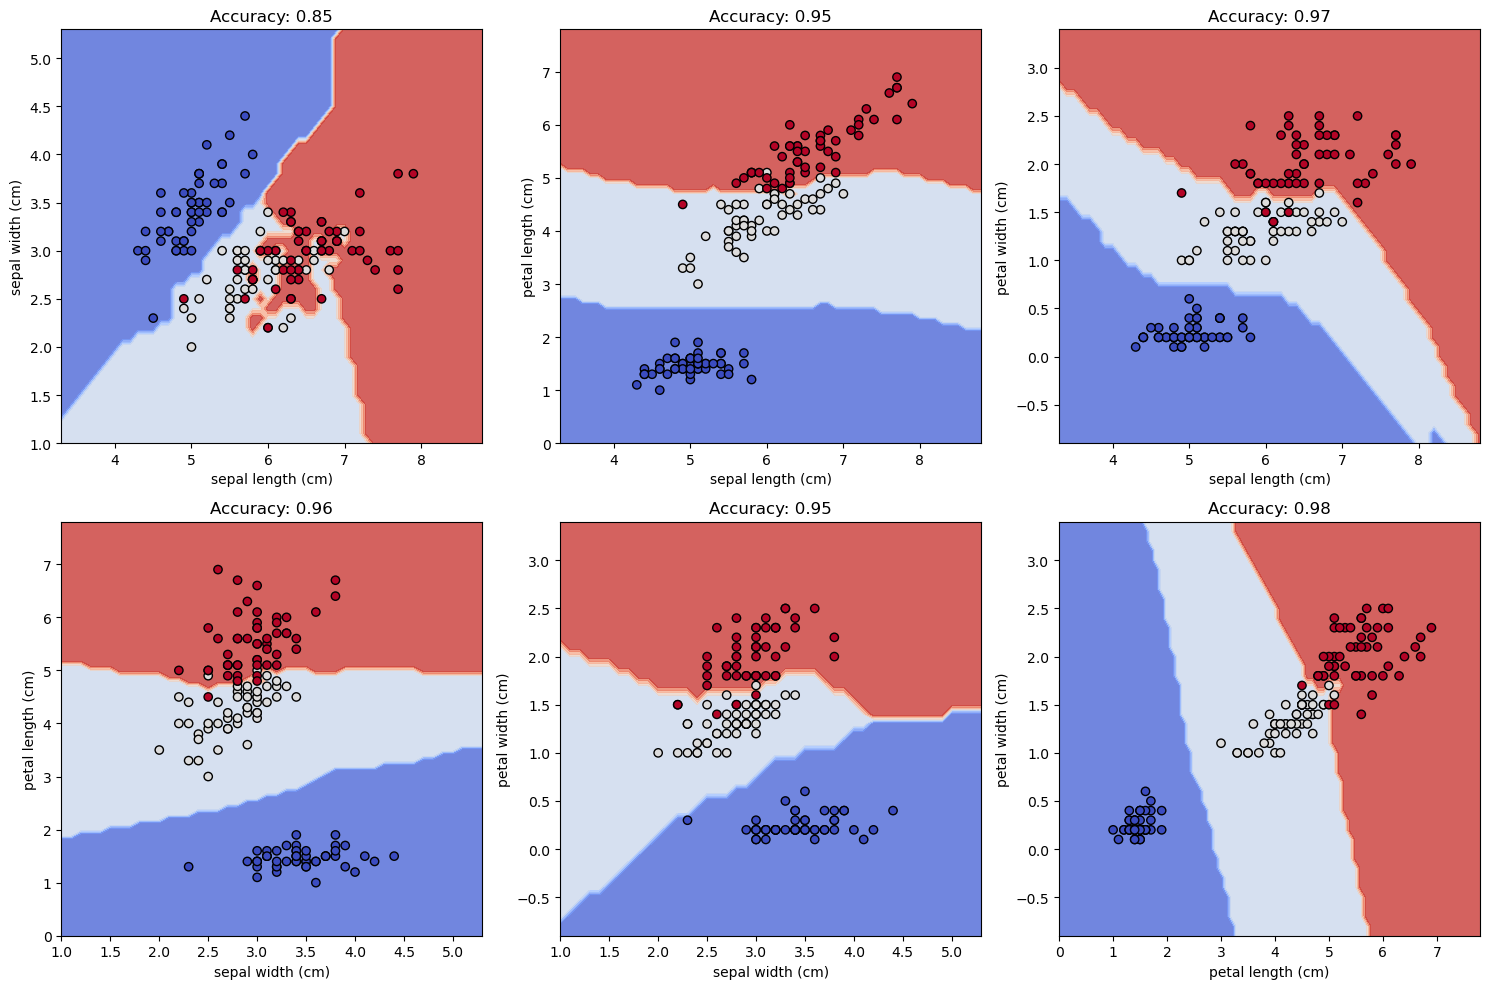

In [14]:
clf = KNeighborsClassifier(n_neighbors=3) # 3近傍
plot_decision_boundaries(clf,df.iloc[:, 0:4],iris.target) # iris.targetを目的変数に指定

In [15]:
clf.fit(df.iloc[:, 0:4], iris.target)
y_pred = clf.predict(df.iloc[:, 0:4])
print(accuracy_score(iris.target, y_pred))  # 予測の正解率を表示

0.96


## <span style="color: DeepPink; ">7.3 決定木</span>

### <span style="color: blue; ">決定木</span> 

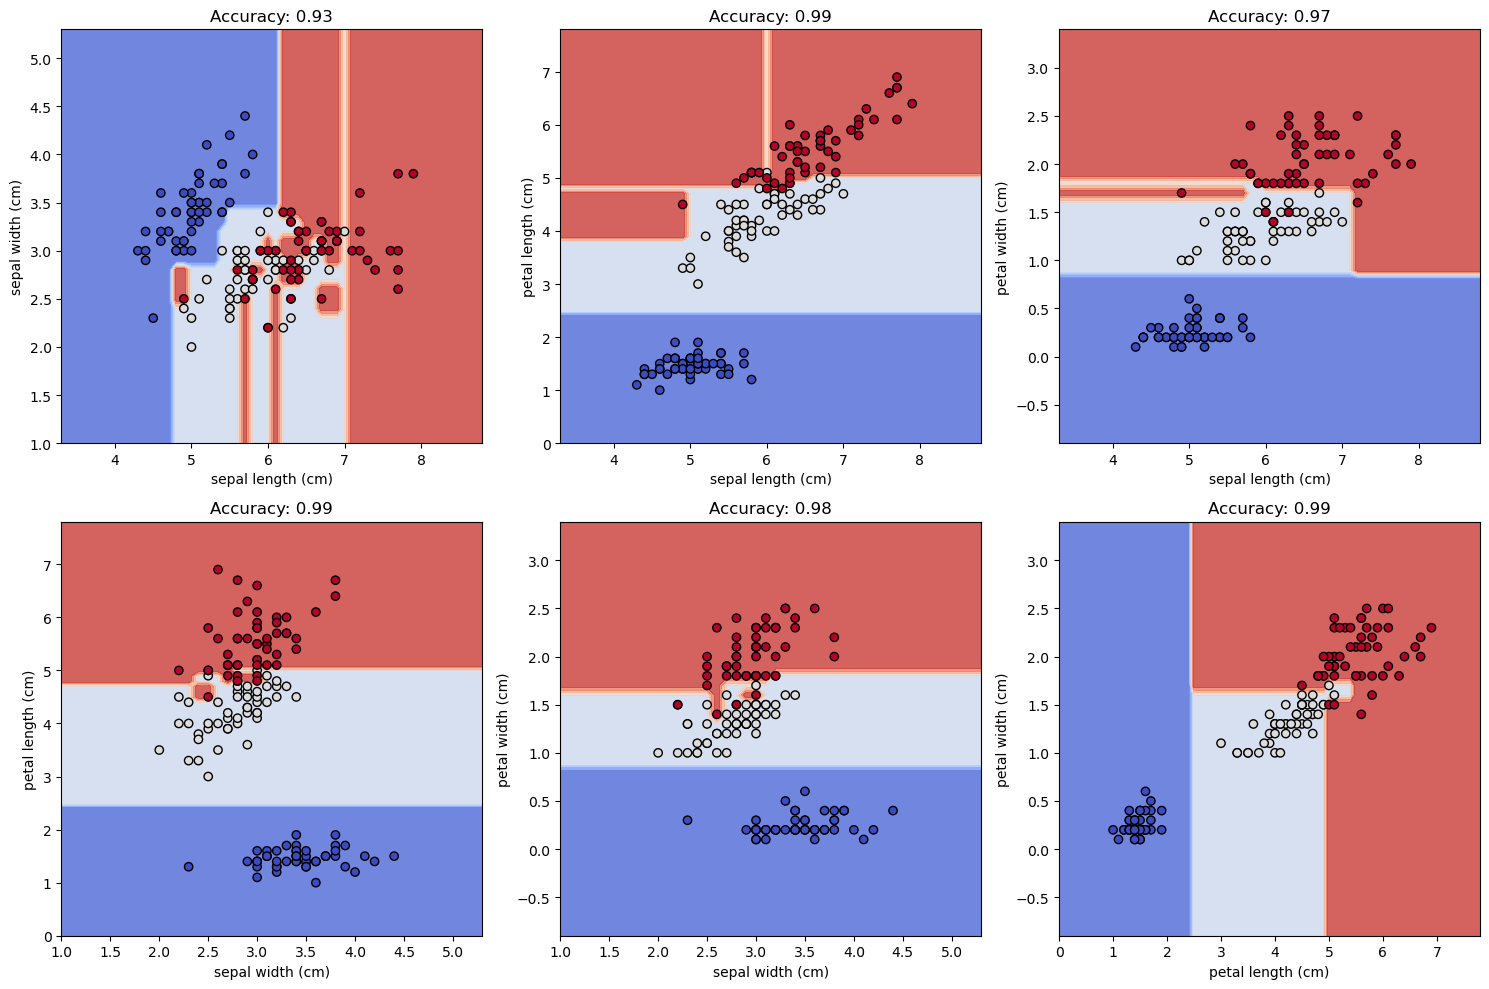

In [16]:
clf = DecisionTreeClassifier()
plot_decision_boundaries(clf,df.iloc[:, 0:4], iris.target)

### <span style="color: blue; ">決定木-ランダムフォレスト</span> 

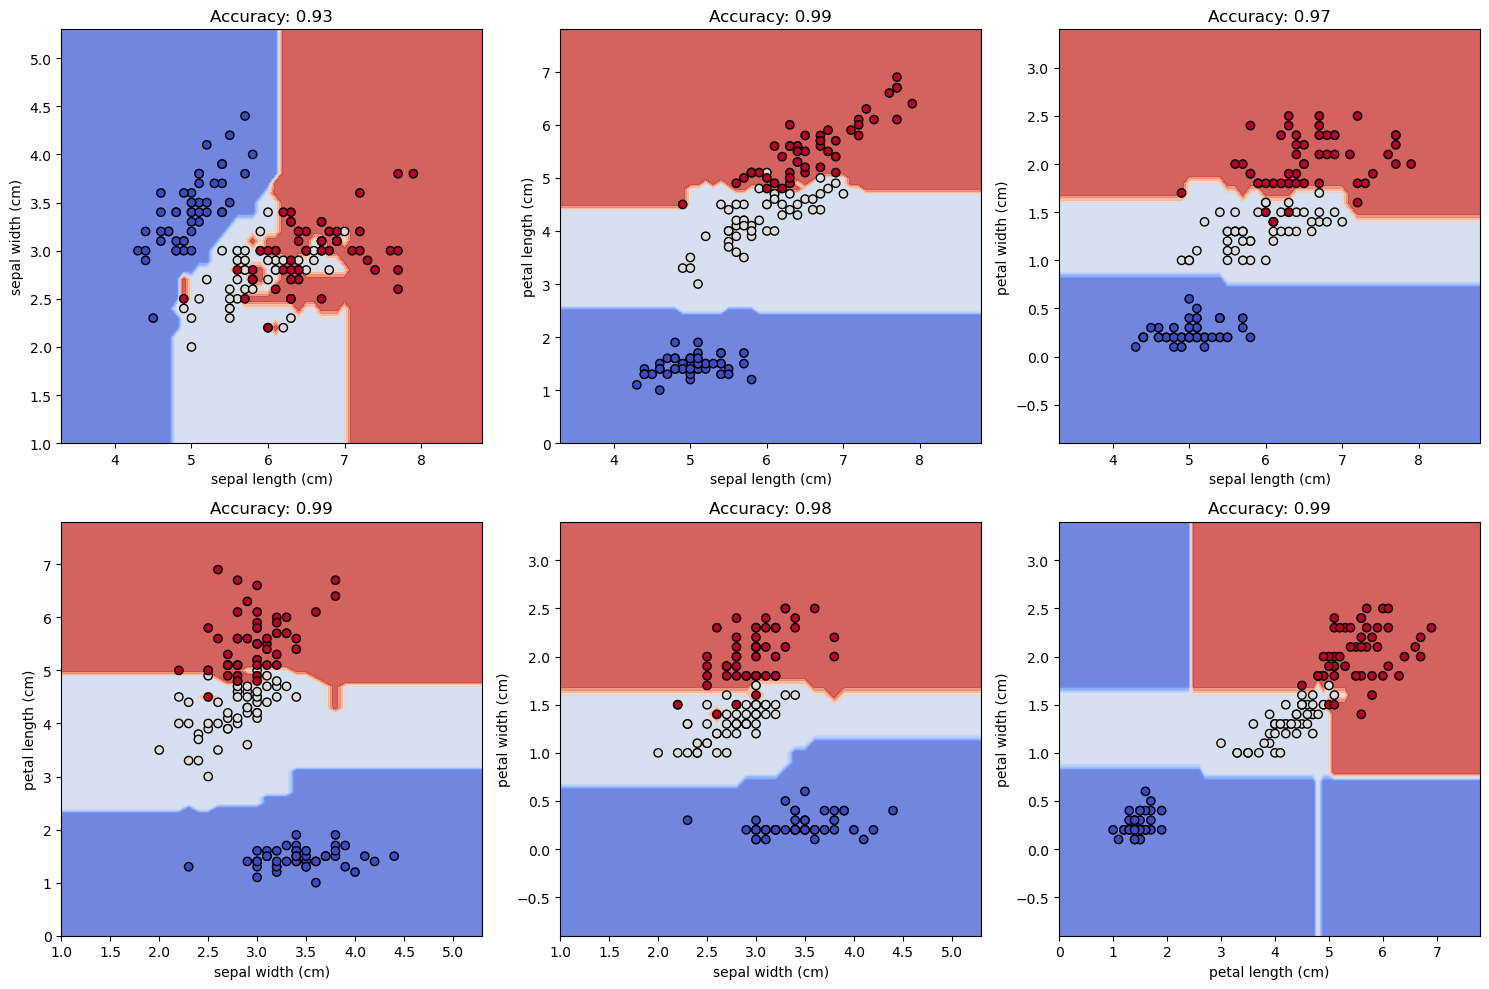

In [17]:
clf = RandomForestClassifier()
plot_decision_boundaries(clf,df.iloc[:, 0:4], iris.target)

### <span style="color: blue; ">決定木-勾配ブースティング</span> 

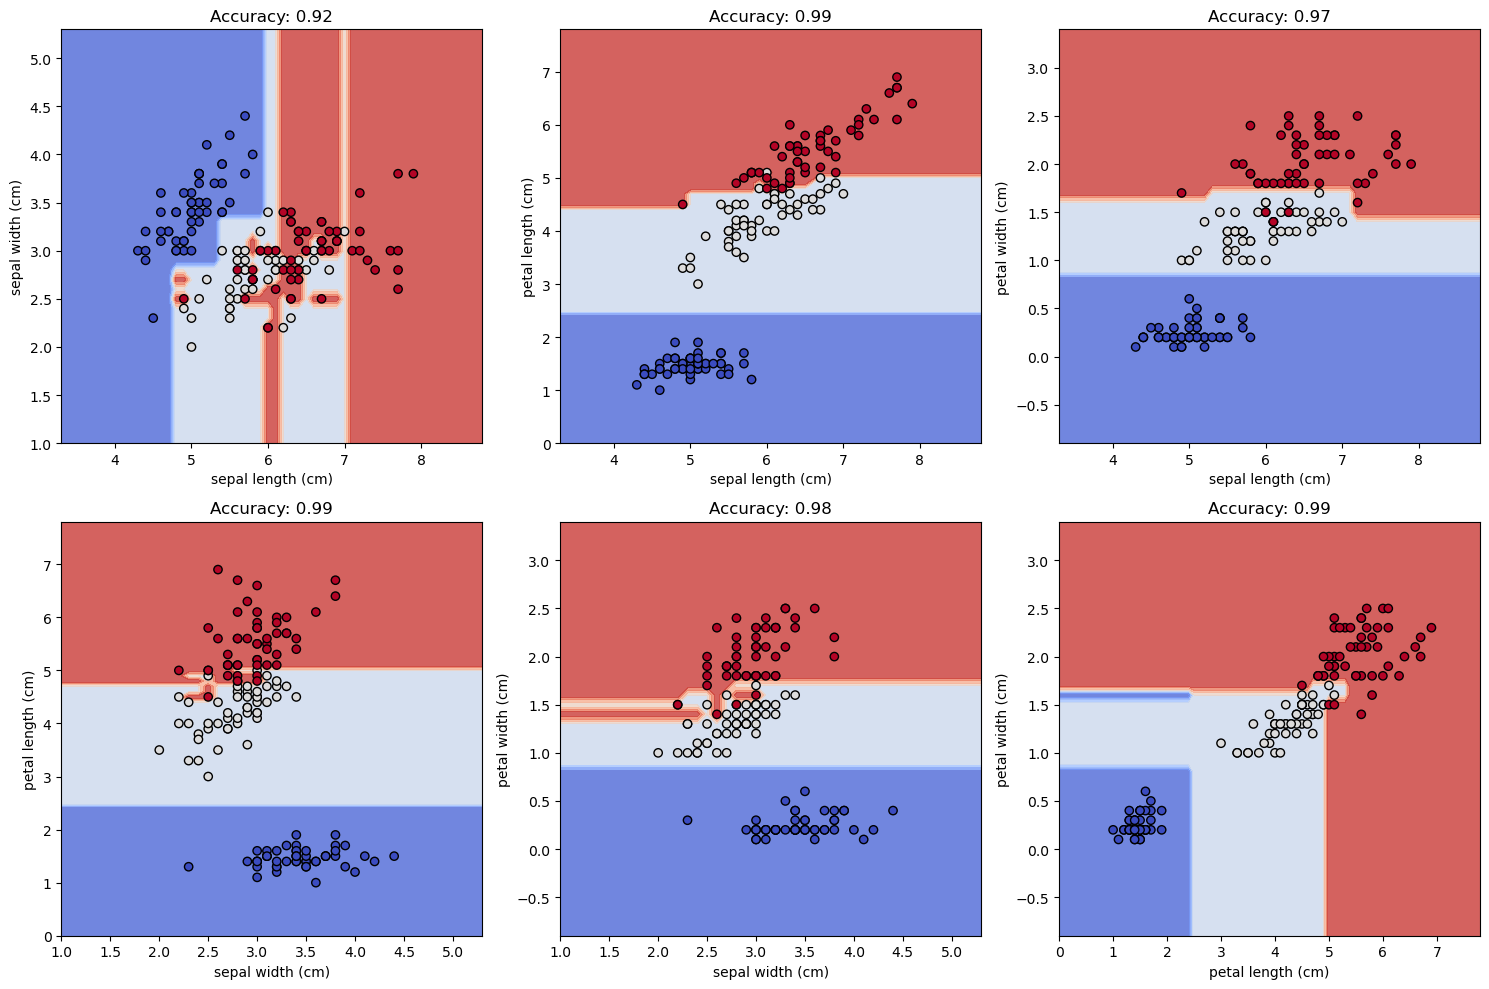

In [18]:
clf = GradientBoostingClassifier()
plot_decision_boundaries(clf,df.iloc[:, 0:4], iris.target)

### <span style="color: blue; ">決定木-勾配ブースティング(XGB)</span> 

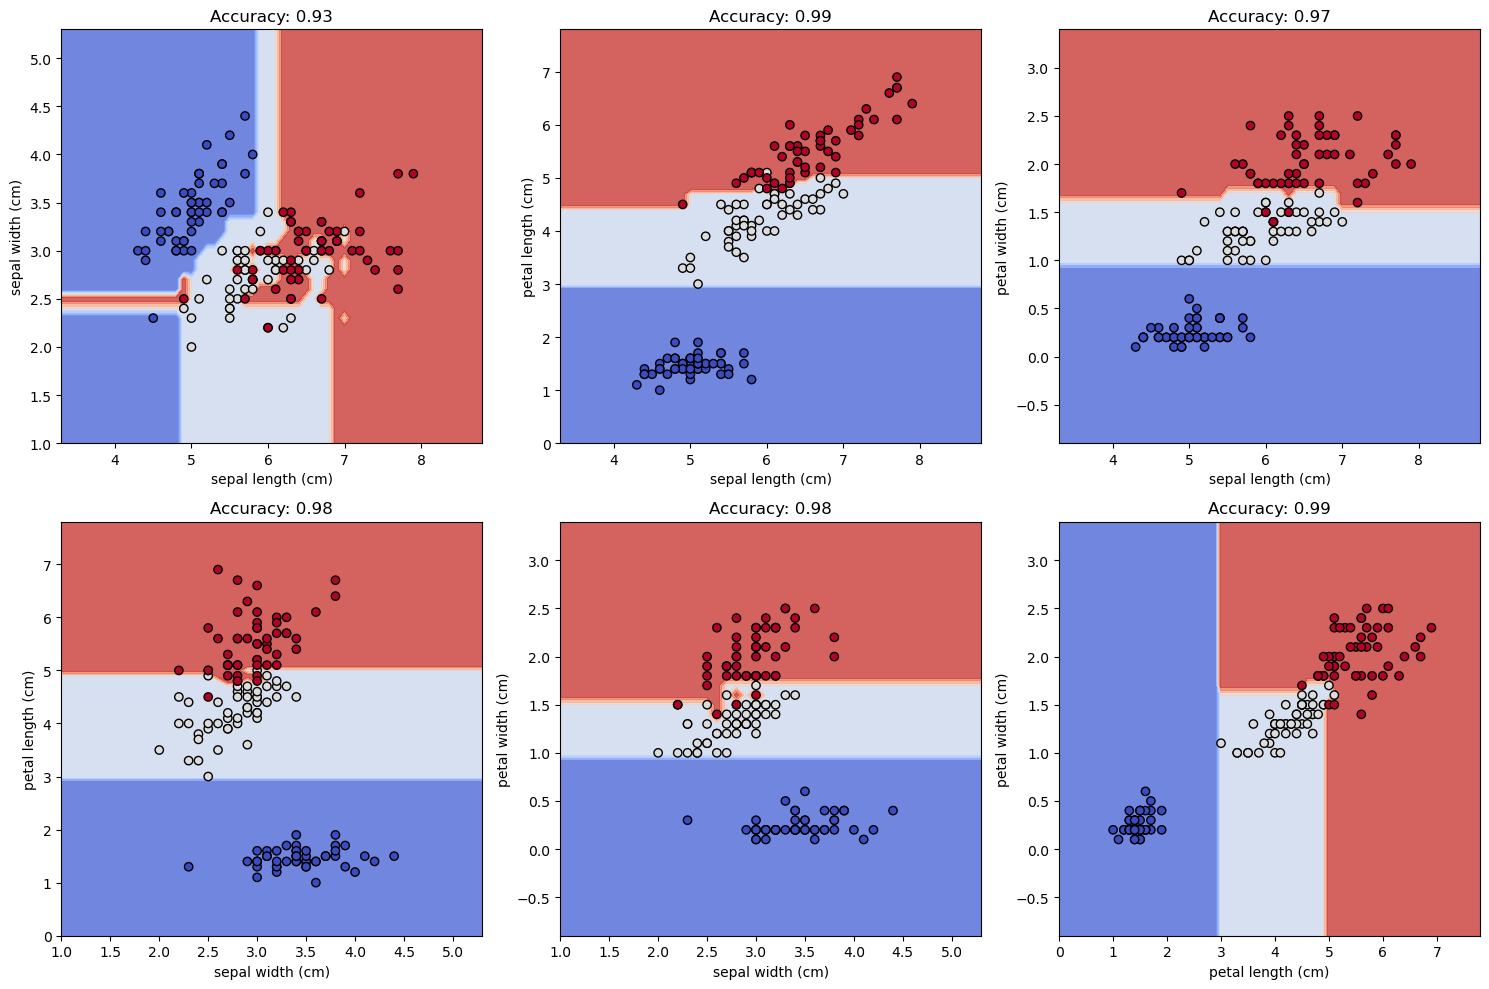

In [19]:
clf =xgb.XGBClassifier()
plot_decision_boundaries(clf,df.iloc[:, 0:4], iris.target)

## <span style="color: DeepPink; ">7.4 重回帰分析（最小二乗法、最小絶対誤差法、リッジ回帰、ラッソ回帰）</span>

最小二乗法による傾き：　 0.41575541635241153
最小二乗法による切片：　 -0.3630755213190291
絶対誤差法による傾き：　 0.41193186849829305
絶対誤差法による切片：　 -0.3605076109859503
リッジ回帰による傾き：　 0.4148619439213934
リッジ回帰による切片：　 -0.3597178519232631
ラッソ回帰による傾き：　 0.3834504853708197
ラッソ回帰による切片：　 -0.241673590690207


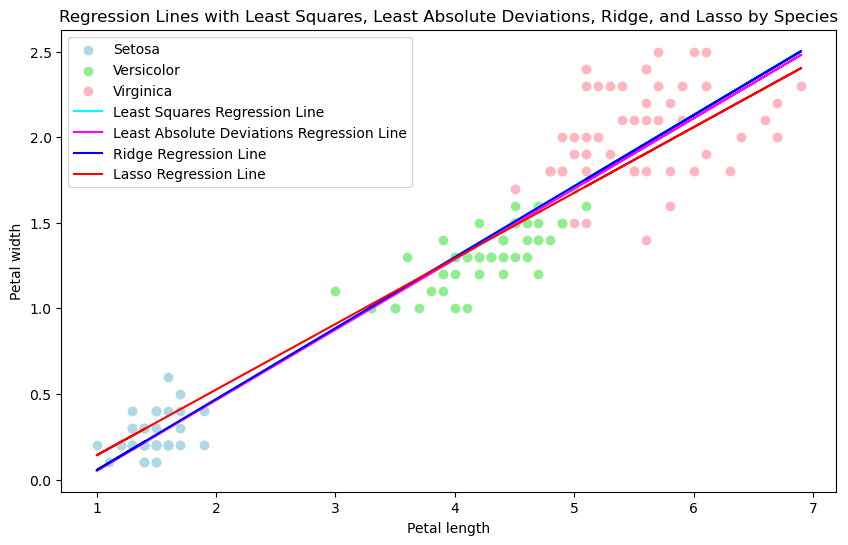

In [20]:
# irisデータセットを読み込む
iris = datasets.load_iris()
X = iris.data[:, 2].reshape(-1, 1)  # 花弁の長さ
y = iris.data[:, 3]  # 花弁の幅

# 最小二乗法による回帰モデル
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)

# 最小絶対値法による回帰モデル（HuberRegressorを使うことで近似的に実現）
# epsilonを大きく設定して、最小絶対値法に近づける
huber = HuberRegressor(epsilon=1.35)
huber.fit(X, y)
y_pred_huber = huber.predict(X)

# リッジ回帰モデル
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
y_pred_ridge = ridge.predict(X)

# ラッソ回帰モデル
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
y_pred_lasso = lasso.predict(X)


# 品種ごとにデータを分割
setosa = iris.data[iris.target == 0]
versicolor = iris.data[iris.target == 1]
virginica = iris.data[iris.target == 2]


#　傾きと切片を抽出
lr_slope = lr.coef_[0]
lr_intercept = lr.intercept_
huber_slope = huber.coef_[0]
huber_intercept = huber.intercept_
ridge_slope = ridge.coef_[0]
ridge_intercept = ridge.intercept_
lasso_slope = lasso.coef_[0] if lasso.coef_.size > 0 else 0
lasso_intercept = lasso.intercept_

print("最小二乗法による傾き：　",lr_slope)
print("最小二乗法による切片：　",lr_intercept)
print("絶対誤差法による傾き：　",huber_slope)
print("絶対誤差法による切片：　",huber_intercept)
print("リッジ回帰による傾き：　",ridge_slope)
print("リッジ回帰による切片：　",ridge_intercept)
print("ラッソ回帰による傾き：　",lasso_slope)
print("ラッソ回帰による切片：　",lasso_intercept)

# 散布図を品種ごとに色分けしてプロット
plt.figure(figsize=(10, 6))
plt.scatter(setosa[:, 2], setosa[:, 3], color='lightblue', label='Setosa')
plt.scatter(versicolor[:, 2], versicolor[:, 3], color='lightgreen', label='Versicolor')
plt.scatter(virginica[:, 2], virginica[:, 3], color='lightpink', label='Virginica')

# 最小二乗法による回帰線
plt.plot(X, y_pred_lr, color='cyan', label='Least Squares Regression Line')
# 最小絶対誤差法による回帰線
plt.plot(X, y_pred_huber, color='magenta', label='Least Absolute Deviations Regression Line')
# リッジ回帰線
plt.plot(X, y_pred_ridge, color='blue', label='Ridge Regression Line')
# ラッソ回帰線
plt.plot(X, y_pred_lasso, color='red', label='Lasso Regression Line')

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Regression Lines with Least Squares, Least Absolute Deviations, Ridge, and Lasso by Species')
plt.legend()
plt.show()



## <span style="color: DeepPink; ">6.5.6 SVMによる非線形判別分析の実践</span>

C：0.01、gamma：0.1


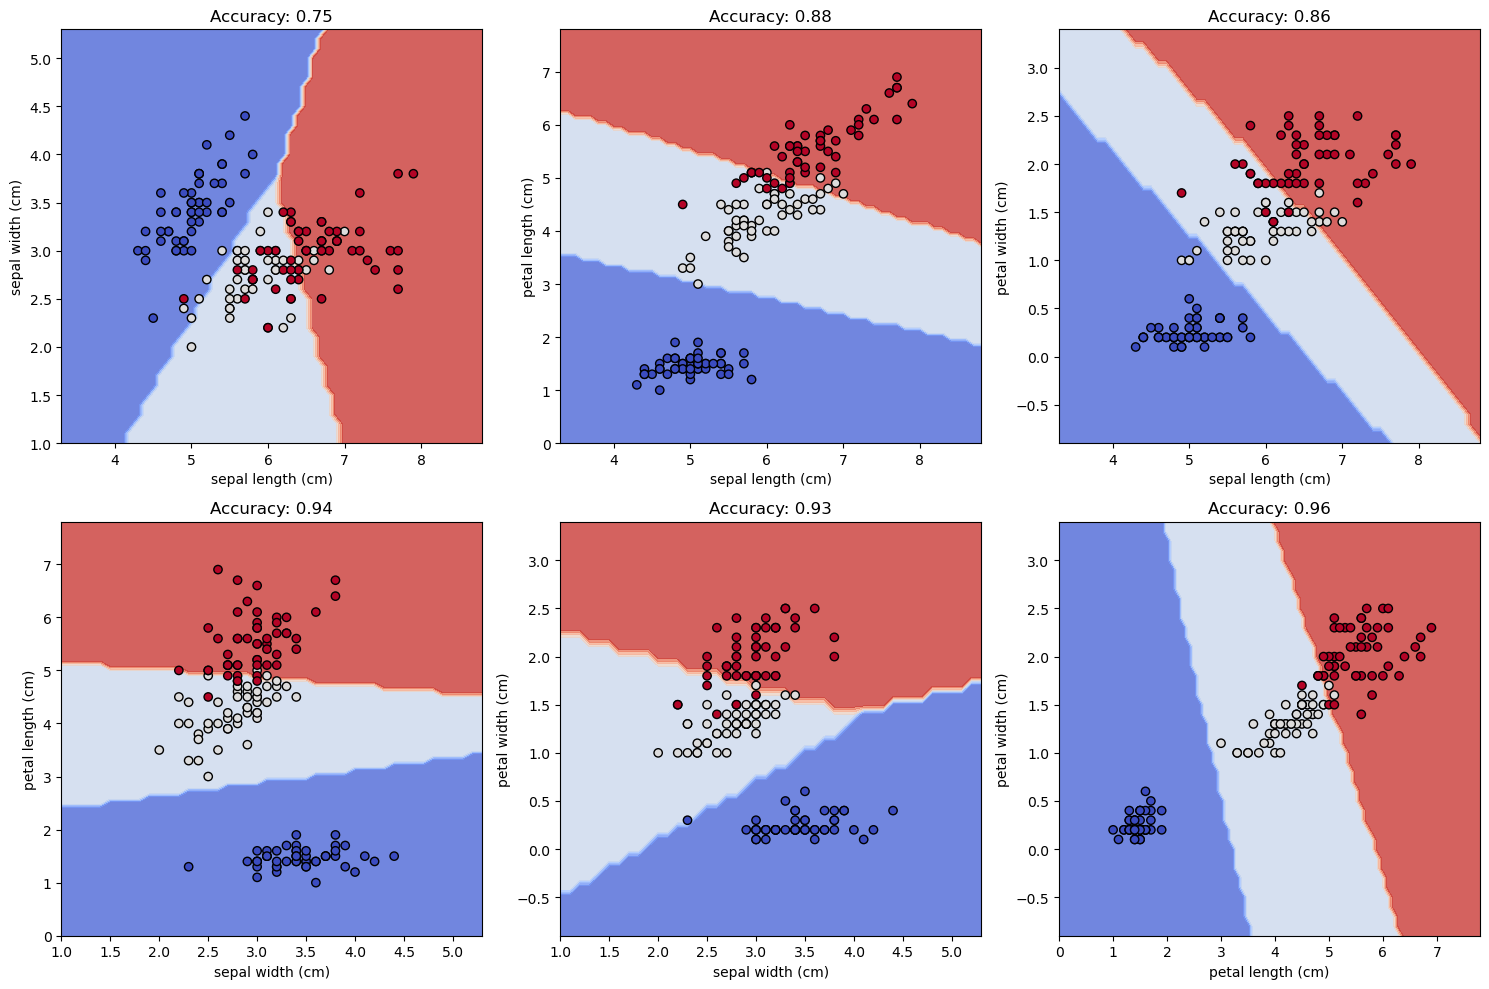

C：0.01、gamma：1


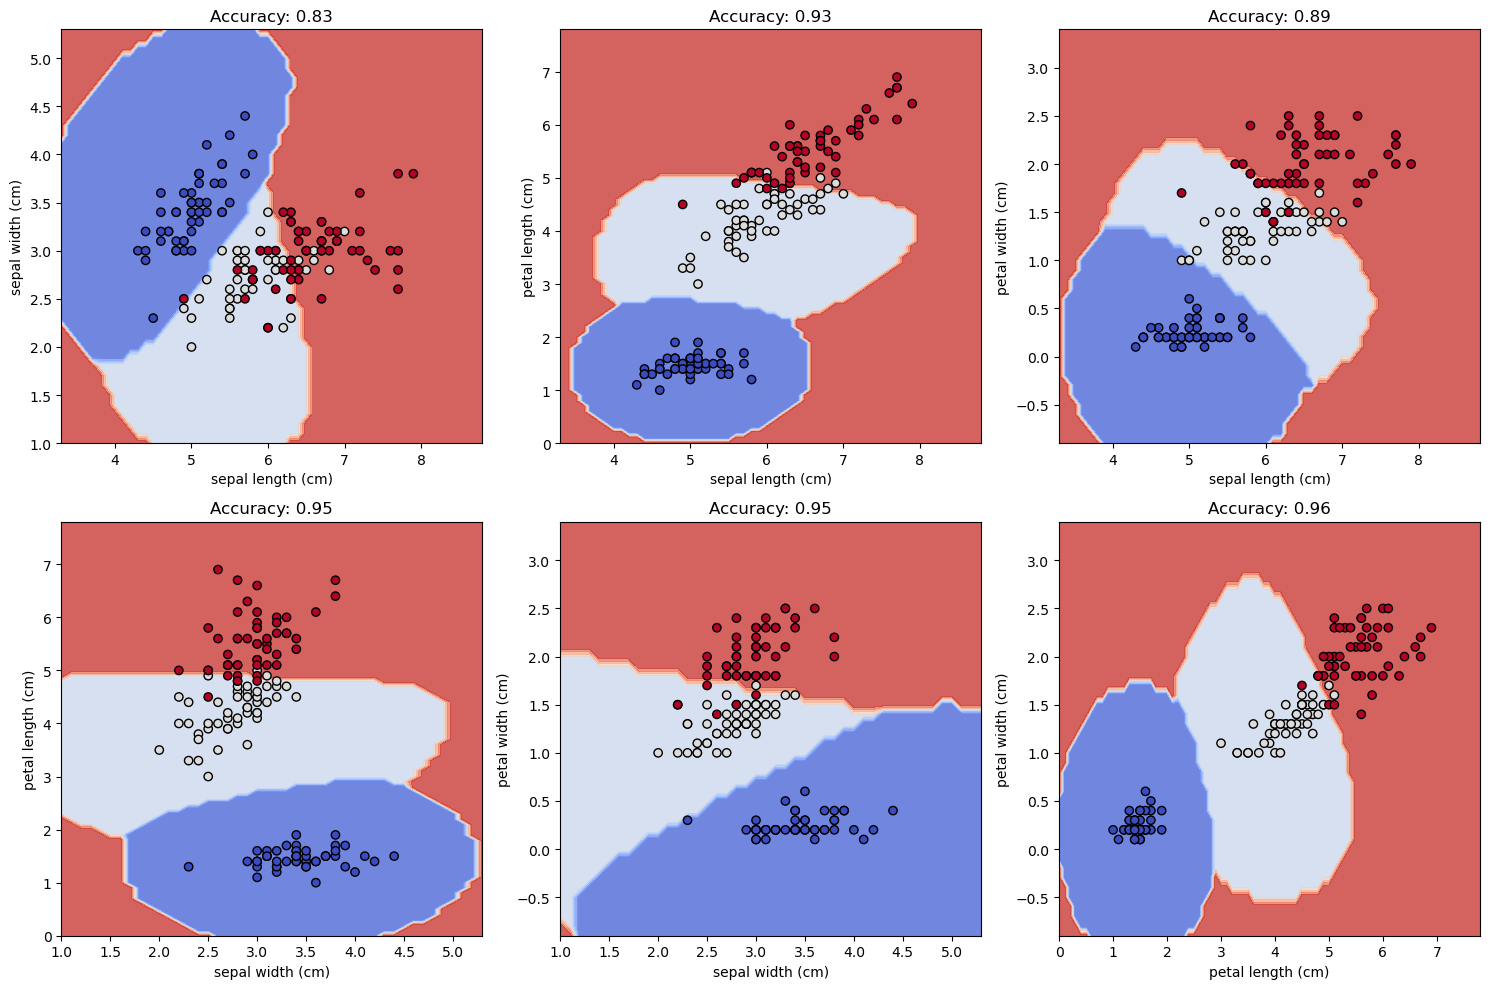

C：0.01、gamma：10


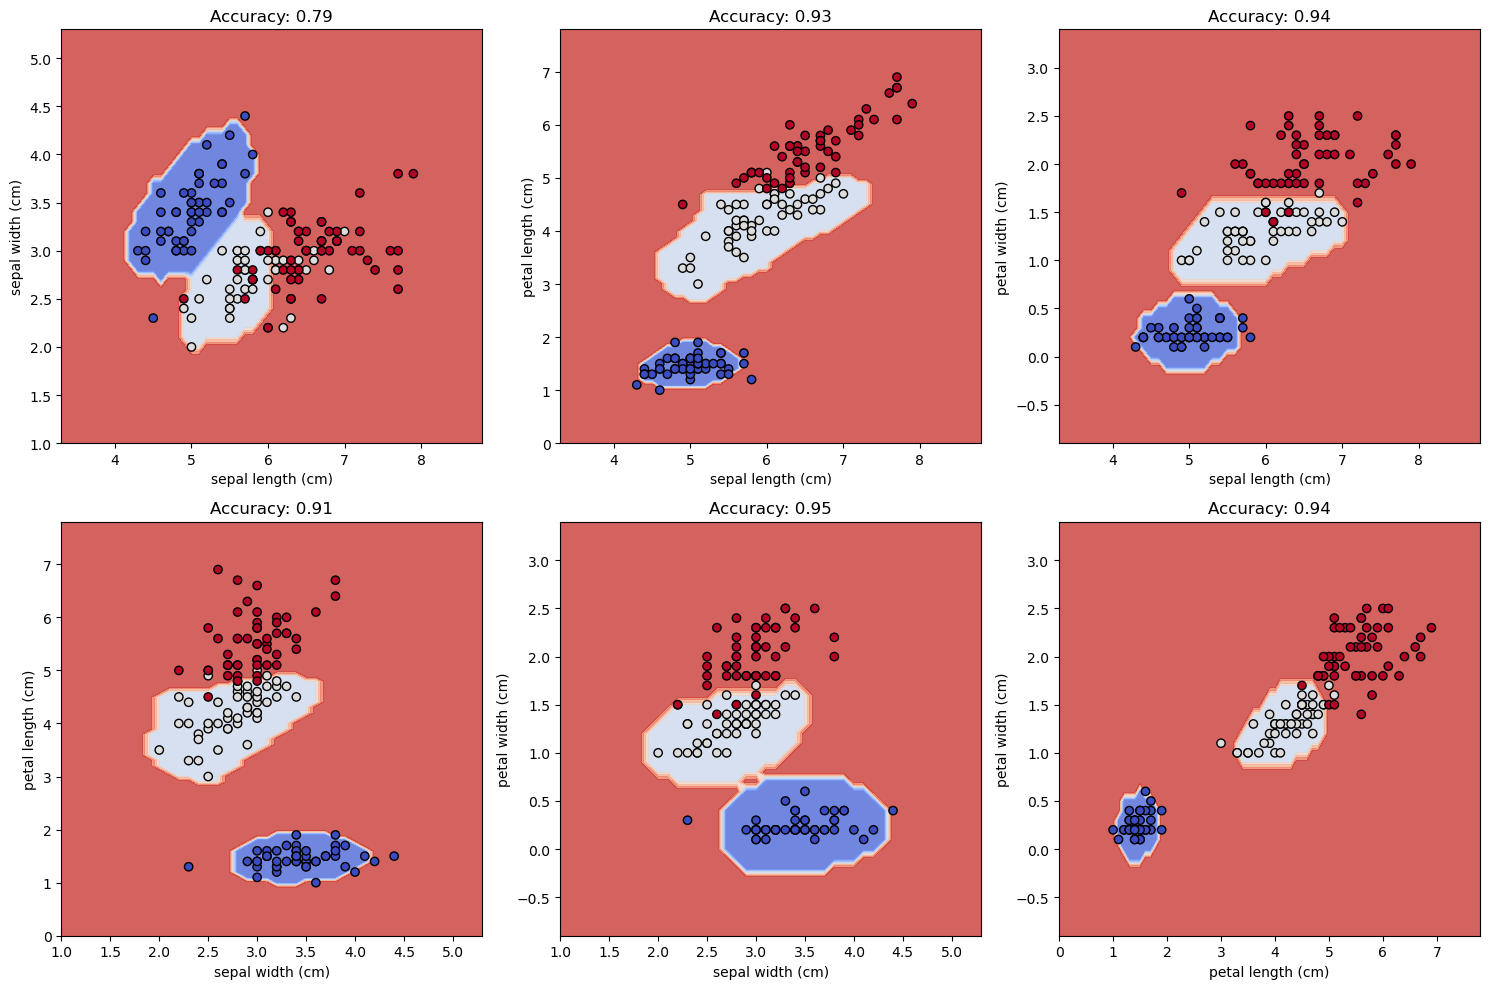

C：1、gamma：0.1


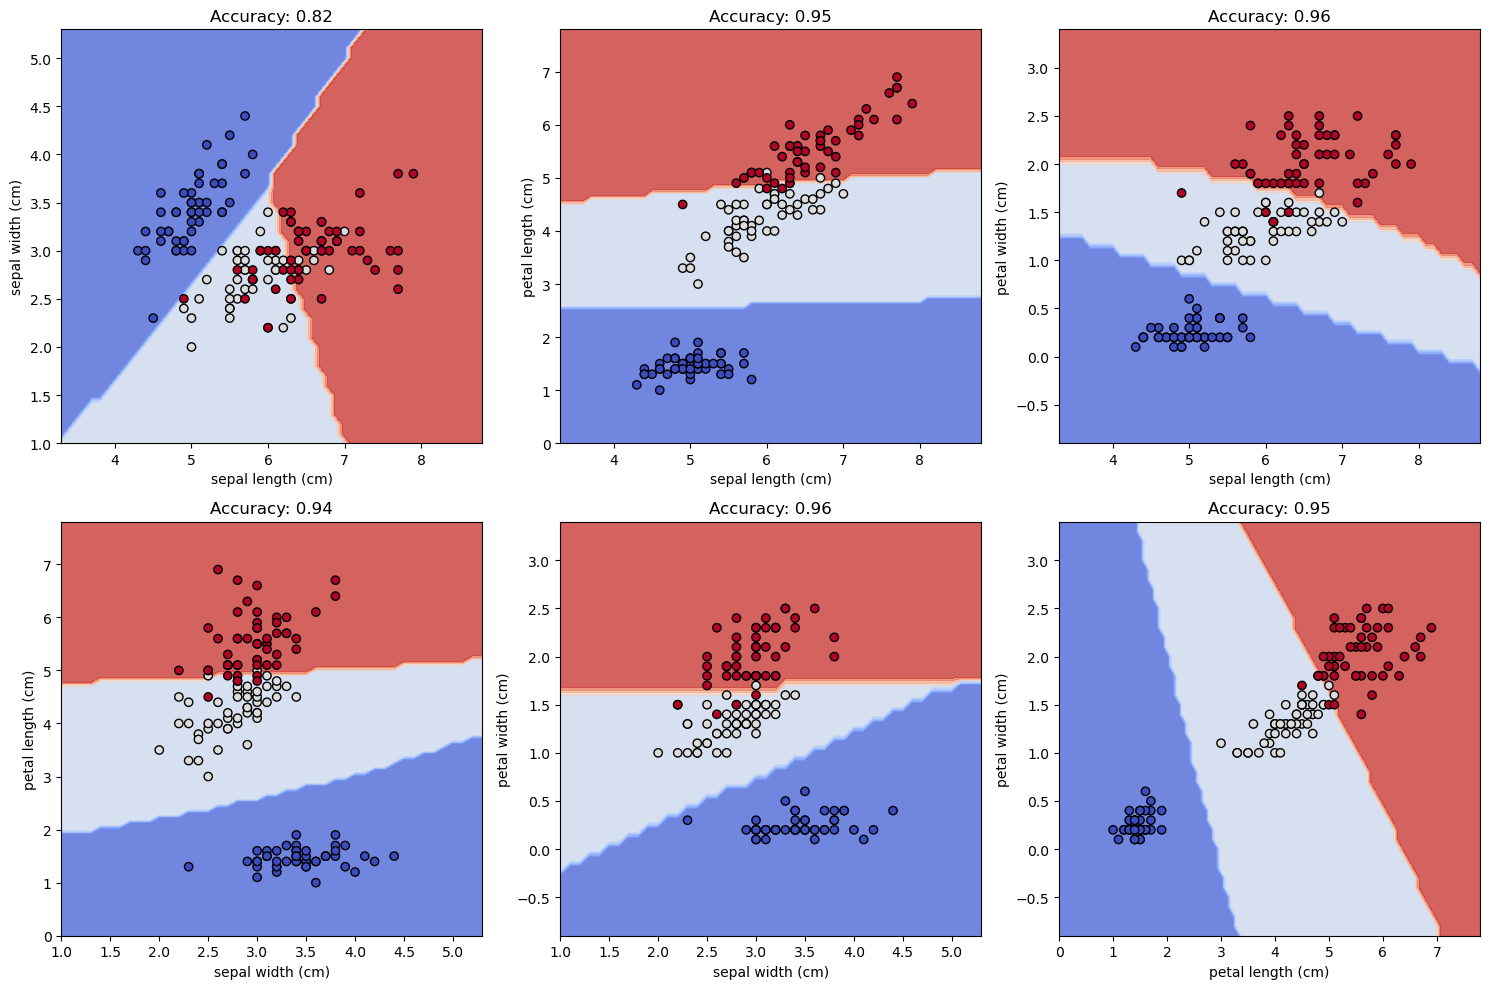

C：1、gamma：1


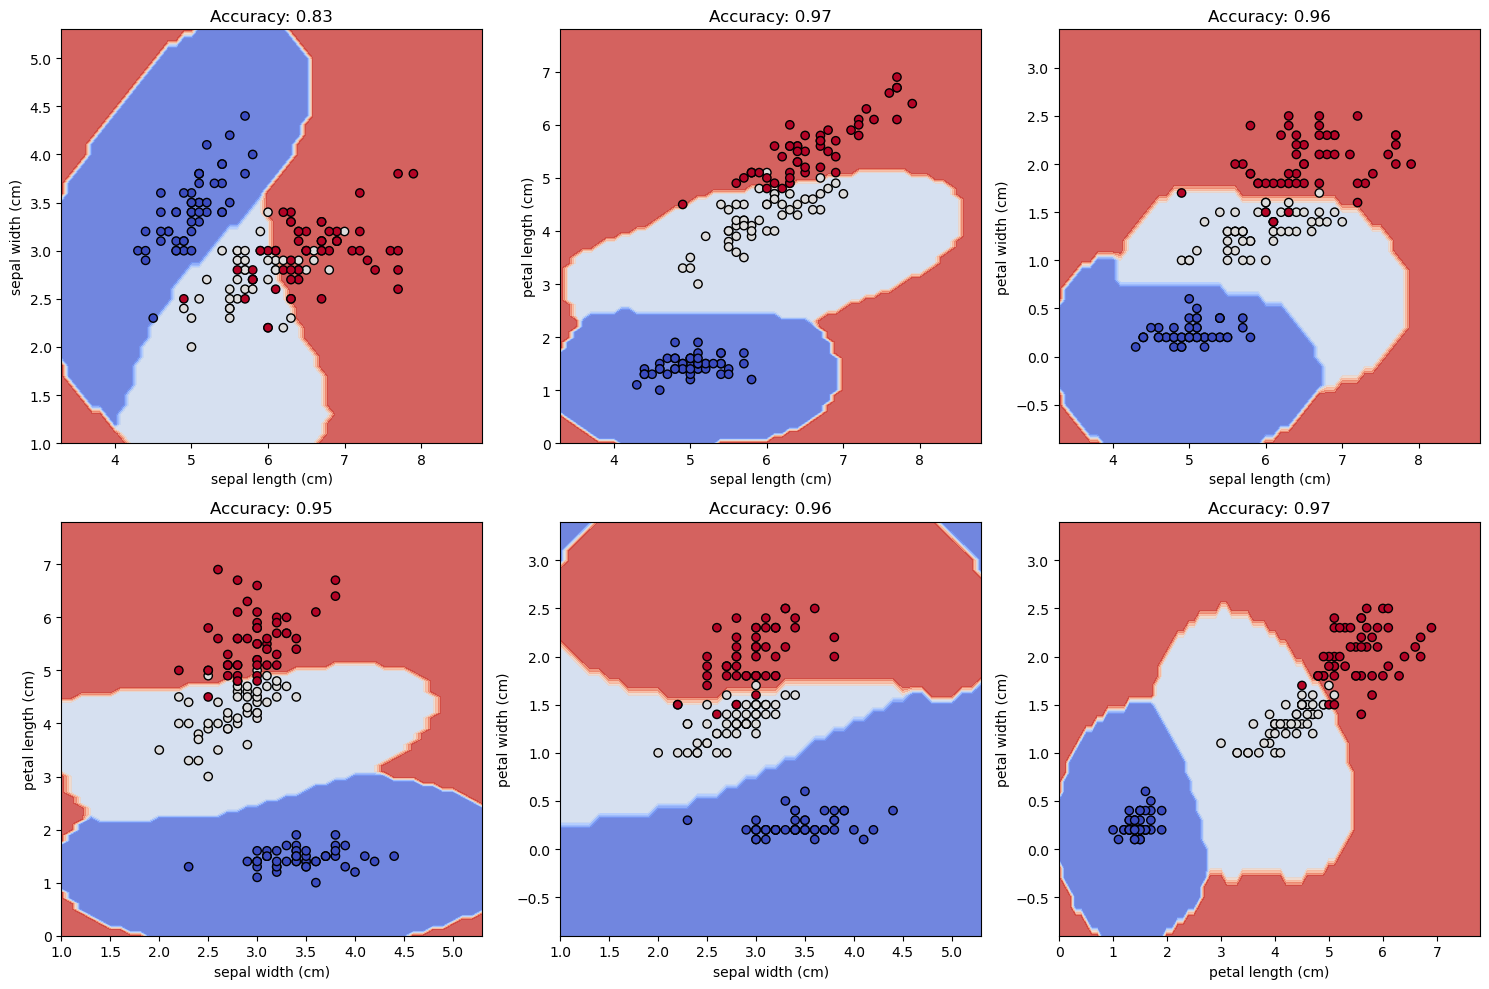

C：1、gamma：10


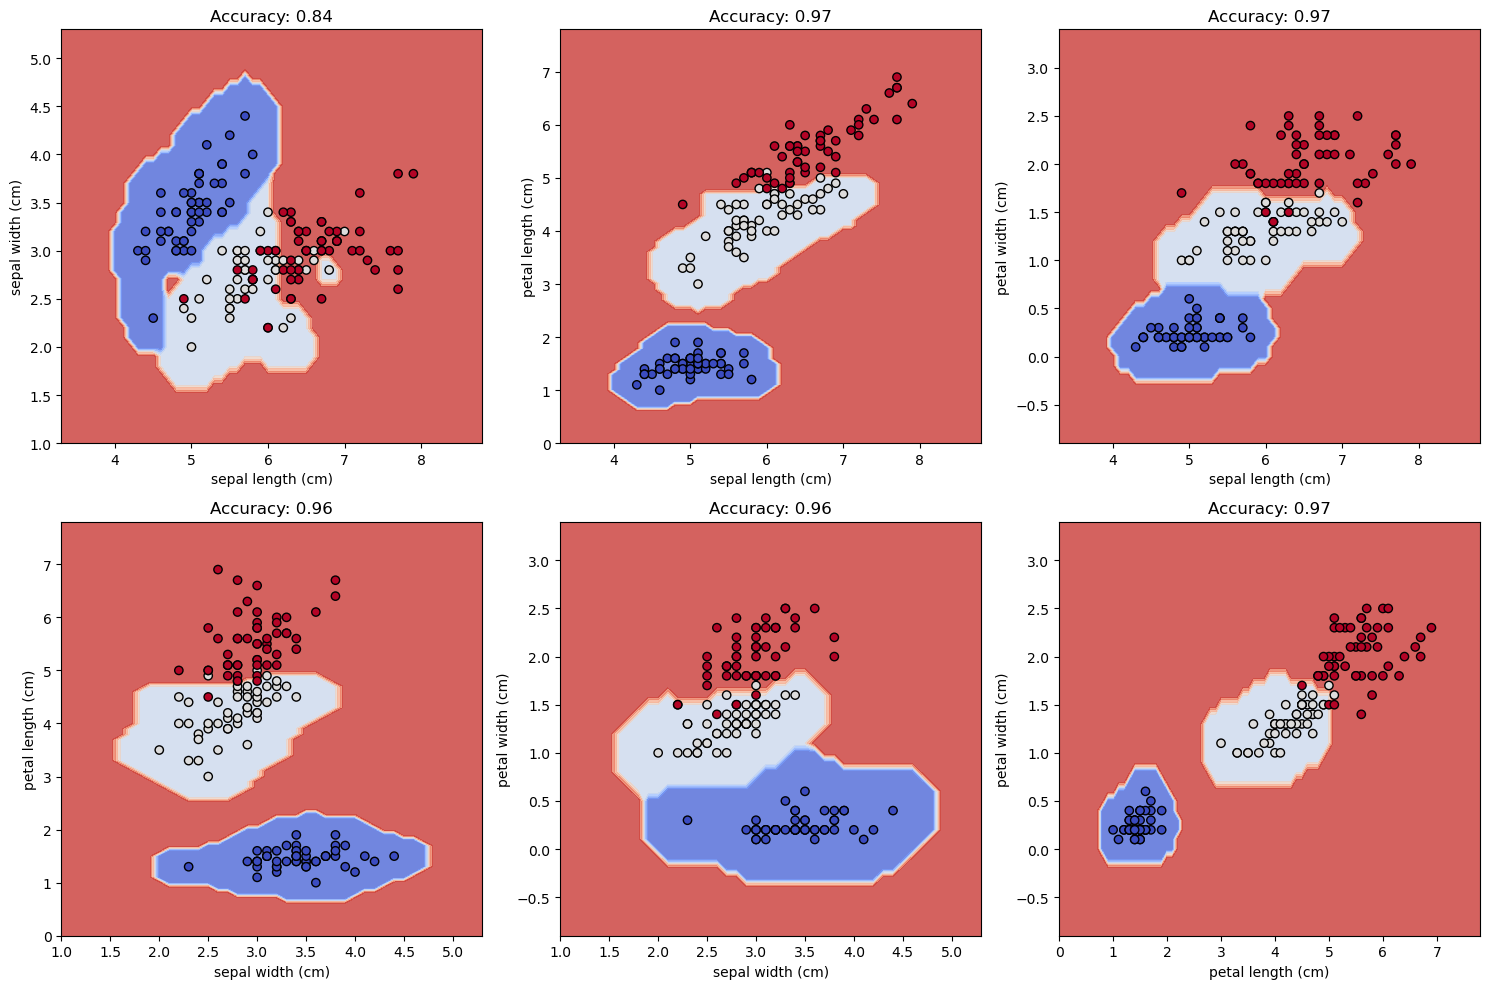

C：100、gamma：0.1


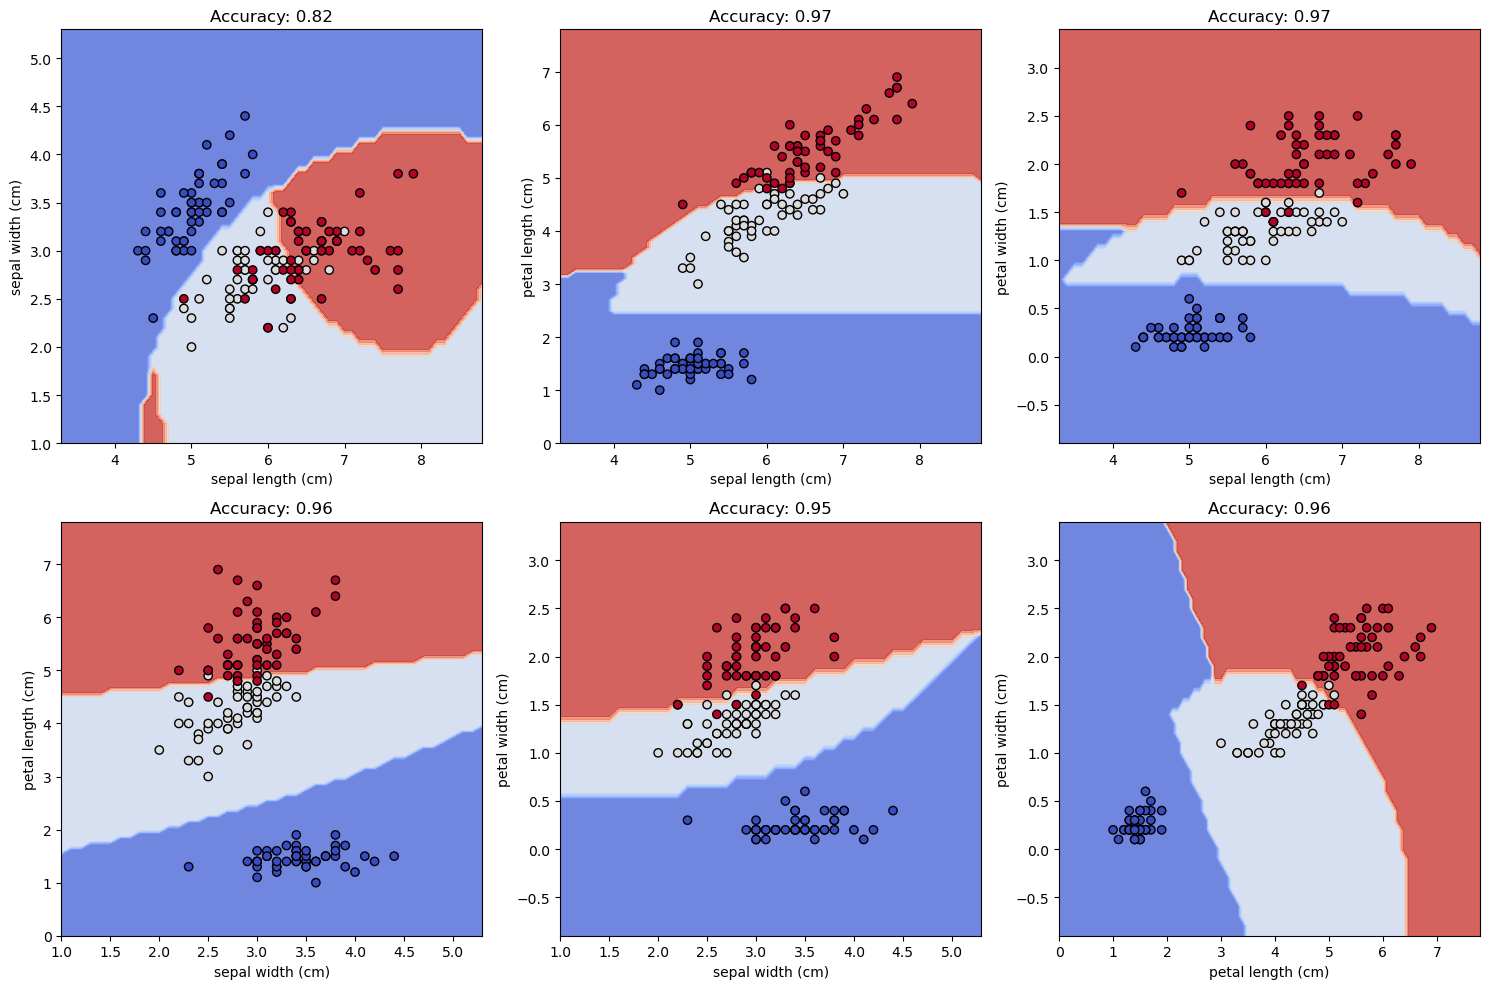

C：100、gamma：1


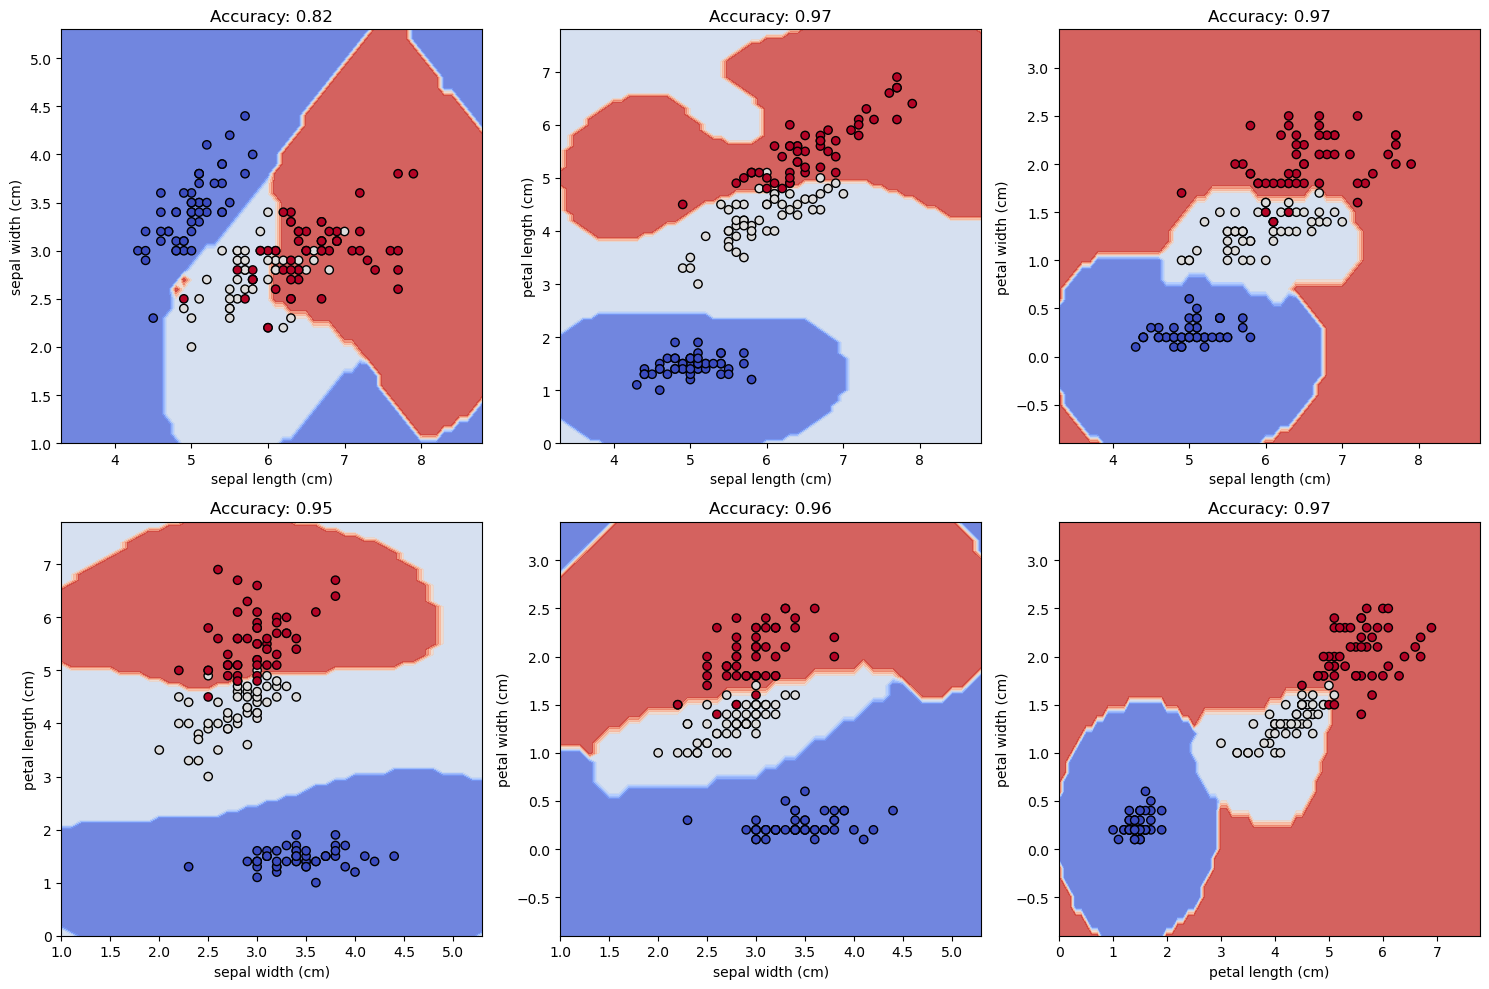

C：100、gamma：10


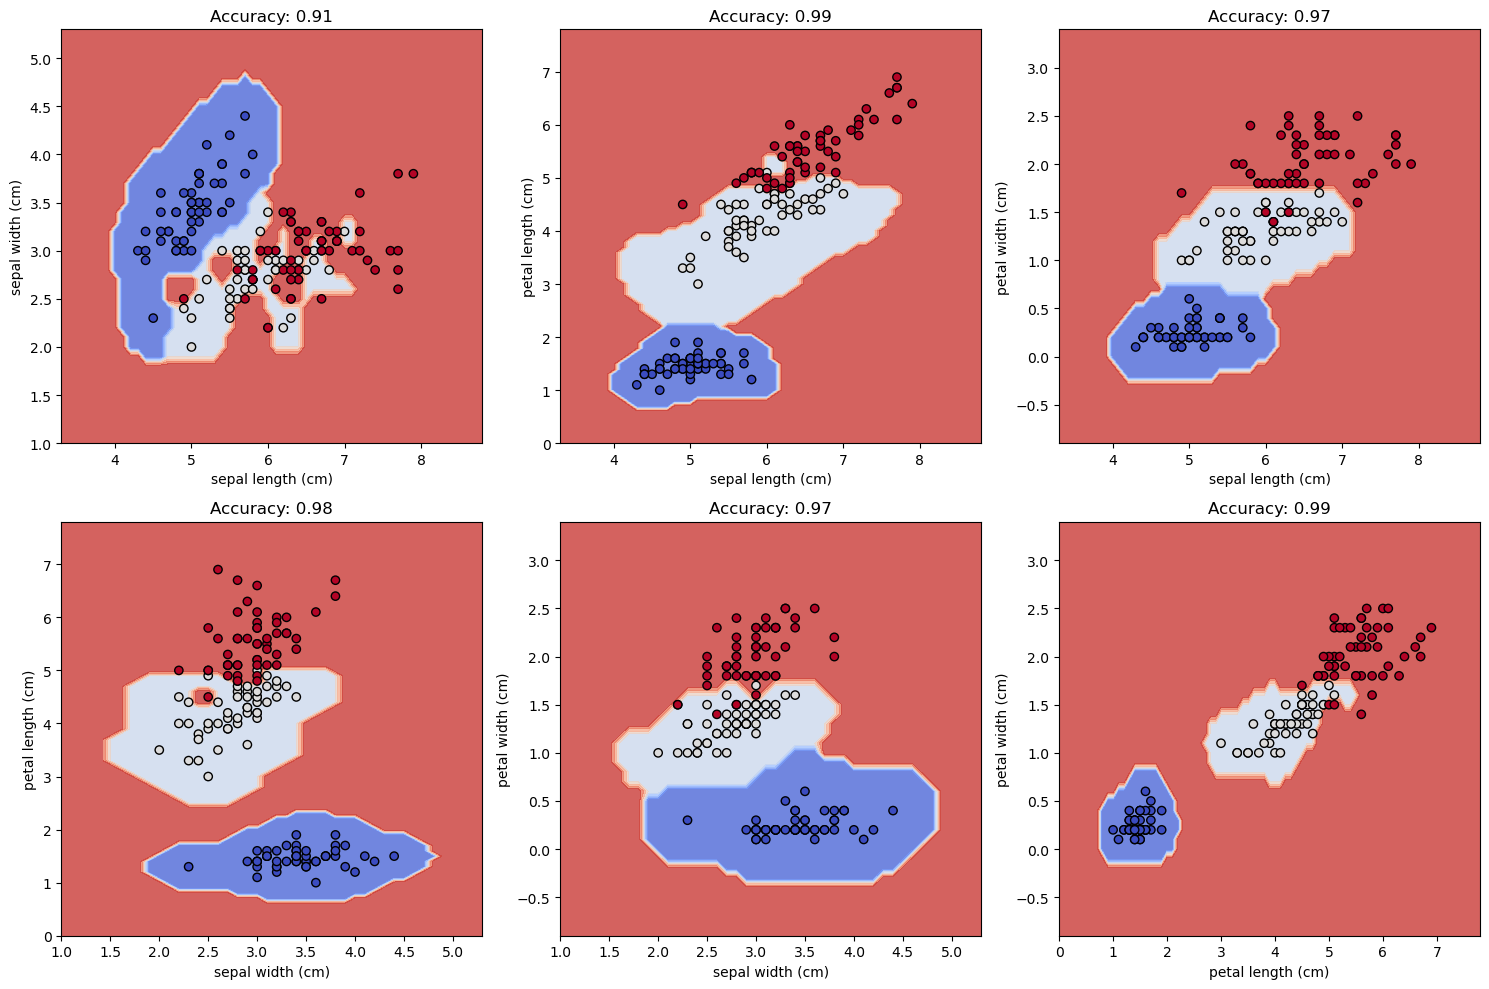

In [21]:
for  C in [0.01, 1, 100]:
    for gamma in [0.1, 1, 10]:
        clf = SVC(C=C, gamma=gamma)
        print(f"C：{C}、gamma：{gamma}")
        plot_decision_boundaries(clf,df.iloc[:, 0:4], iris.target)

## <span style="color: DeepPink; ">6.6 ニューラルネットワーク </span>

In [21]:
# Irisデータセットの読み込み
iris = load_iris()
X = iris.data
y = iris.target

# データの前処理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# ①OneHoteEncoder
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))


# ②ニューラルネットワークの構築
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# ③モデルの層構造を表示
model.summary()

# ④モデルのコンパイル
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ⑤モデルの訓練
history=model.fit(X_scaled,y_encoded , epochs=100, batch_size=10, verbose=1)

# ⑥モデルの評価
loss, accuracy = model.evaluate(X_scaled,y_encoded )
print(f'Loss: {loss}, Accuracy: {accuracy}')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



C:\Users\tetsu\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100


15/15 [==============================] - 0s 1ms/step - loss: 1.0644 - accuracy: 0.4000
Epoch 2/100
15/15 [==============================] - 0s 786us/step - loss: 0.9721 - accuracy: 0.5400
Epoch 3/100
15/15 [==============================] - 0s 752us/step - loss: 0.8928 - accuracy: 0.6200
Epoch 4/100
15/15 [==============================] - 0s 709us/step - loss: 0.8205 - accuracy: 0.7400
Epoch 5/100
15/15 [==============================] - 0s 786us/step - loss: 0.7570 - accuracy: 0.8133
Epoch 6/100
15/15 [==============================] - 0s 714us/step - loss: 0.7006 - accuracy: 0.8133
Epoch 7/100
15/15 [==============================] - 0s 714us/step - loss: 0.6451 - accuracy: 0.8400
Epoch 8/100
15/15 [==============================] - 0s 643us/step - loss: 0.5946 - accuracy: 0.8467
Epoch 9/100
15/15 [==============================] - 0s 643us/step - loss: 0.5464 - accuracy: 0.8533
Epoch 10/100
15/15 [==============================] - 0s 643us/step - loss: 0.5052 - accura

Epoch 77/100
15/15 [==============================] - 0s 571us/step - loss: 0.0882 - accuracy: 0.9533
Epoch 78/100
15/15 [==============================] - 0s 632us/step - loss: 0.0872 - accuracy: 0.9533
Epoch 79/100
15/15 [==============================] - 0s 708us/step - loss: 0.0878 - accuracy: 0.9533
Epoch 80/100
15/15 [==============================] - 0s 636us/step - loss: 0.0847 - accuracy: 0.9533
Epoch 81/100
15/15 [==============================] - 0s 643us/step - loss: 0.0836 - accuracy: 0.9600
Epoch 82/100
15/15 [==============================] - 0s 643us/step - loss: 0.0841 - accuracy: 0.9667
Epoch 83/100
15/15 [==============================] - 0s 571us/step - loss: 0.0811 - accuracy: 0.9667
Epoch 84/100
15/15 [==============================] - 0s 643us/step - loss: 0.0799 - accuracy: 0.9667
Epoch 85/100
15/15 [==============================] - 0s 643us/step - loss: 0.0793 - accuracy: 0.9600
Epoch 86/100
15/15 [==============================] - 0s 611us/step - loss: 0.0782

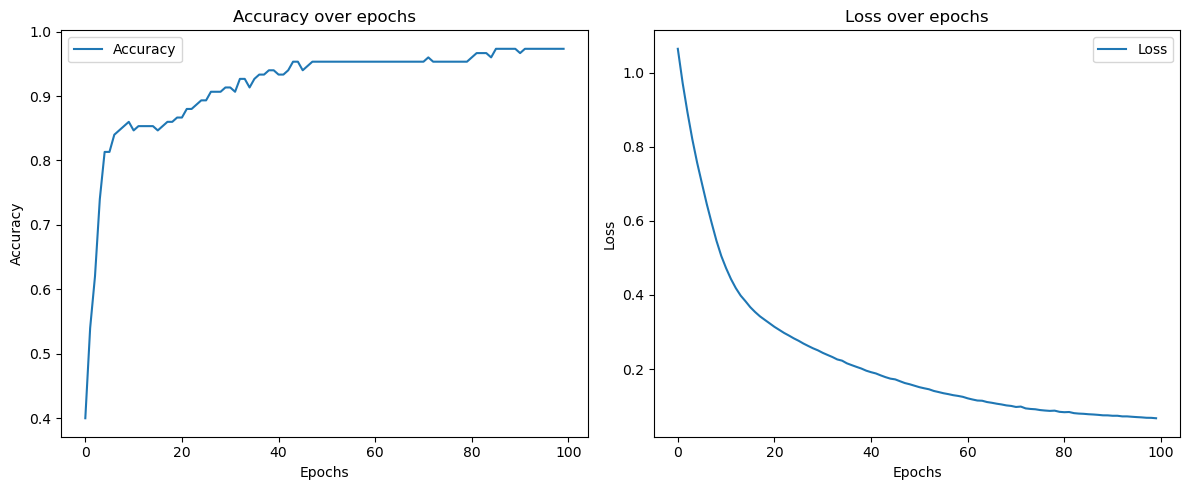

In [22]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()